In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
sns.set(style = 'whitegrid' ,font = 'Verdana', font_scale = 1.1, rc={'axes.facecolor':'#fff8dc', 'figure.facecolor':'#fff8dc',
                                                                   "axes.spines.right": False, "axes.spines.top": False})

Text(0.5, 1.0, 'Distribution of charges')

<Figure size 1000x600 with 0 Axes>

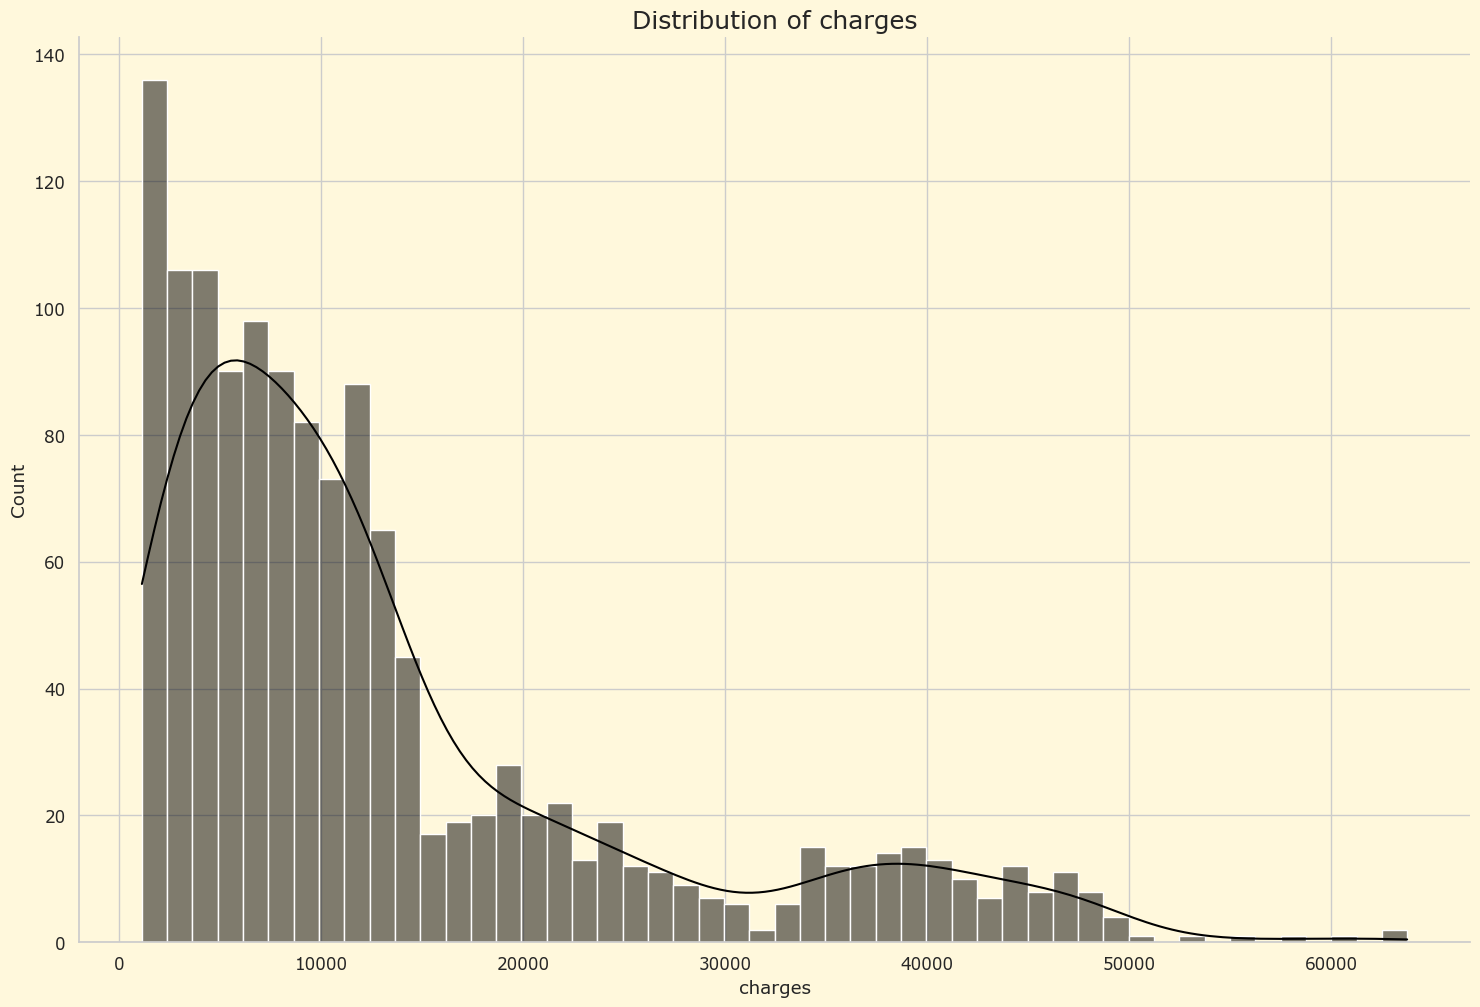

In [4]:
plt.figure(figsize = (10, 6))
sns.displot(x = 'charges', data = data, bins = 50, kde = True, height = 10, aspect = 1.5, color = 'Black')
plt.title('Distribution of charges', fontsize = 18)

In [5]:
corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [6]:
def boxplot(col_name):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (14, 10))
    sns.boxplot(ax = axes[0], x = col_name , y = 'charges', data = data, 
                width = 1, palette = 'magma')
    axes[0].ticklabel_format(style = 'plain', axis = 'y')
    axes[0].set_title((col_name + ' vs Medical Charges'), fontsize = 16)

    sns.countplot(ax = axes[1], x = col_name , data = data, palette = 'magma')
    axes[1].set_title((col_name + ' Count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.4)

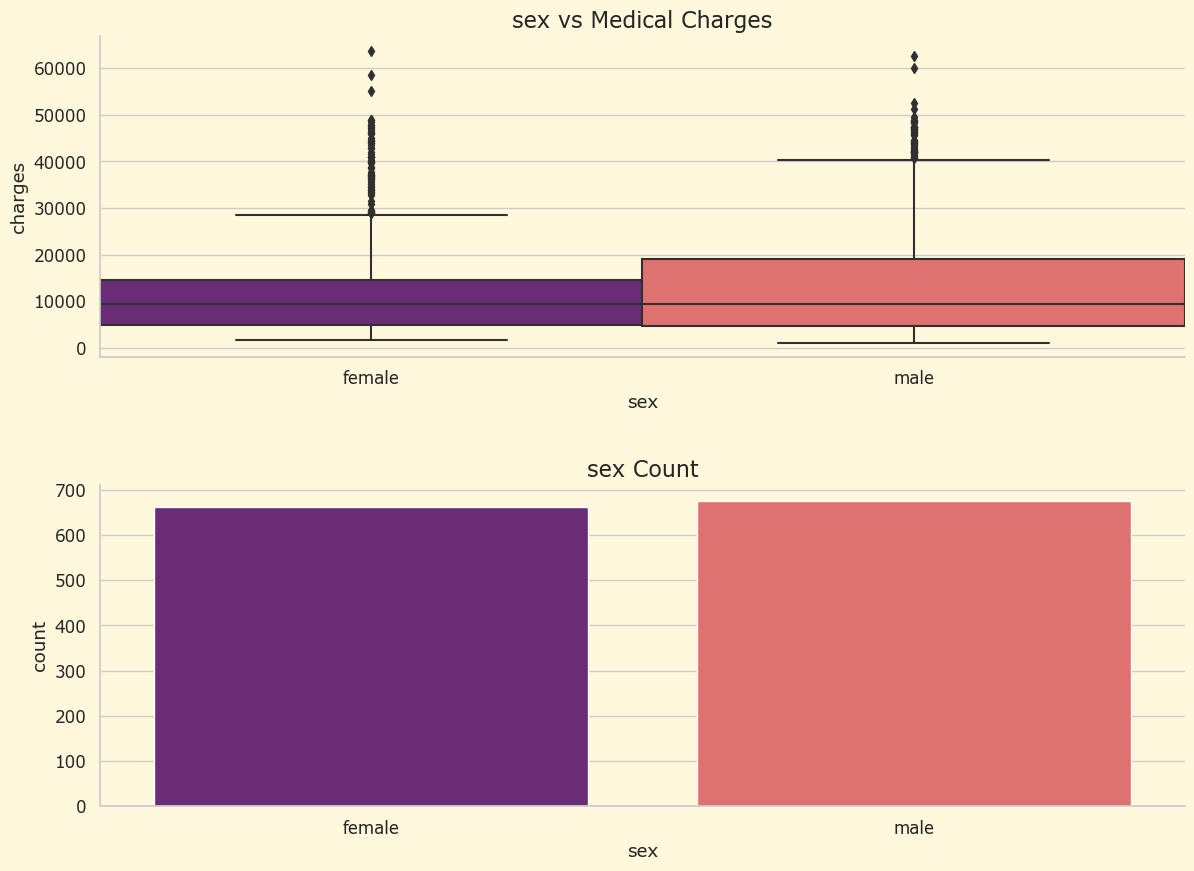

In [7]:
boxplot('sex')

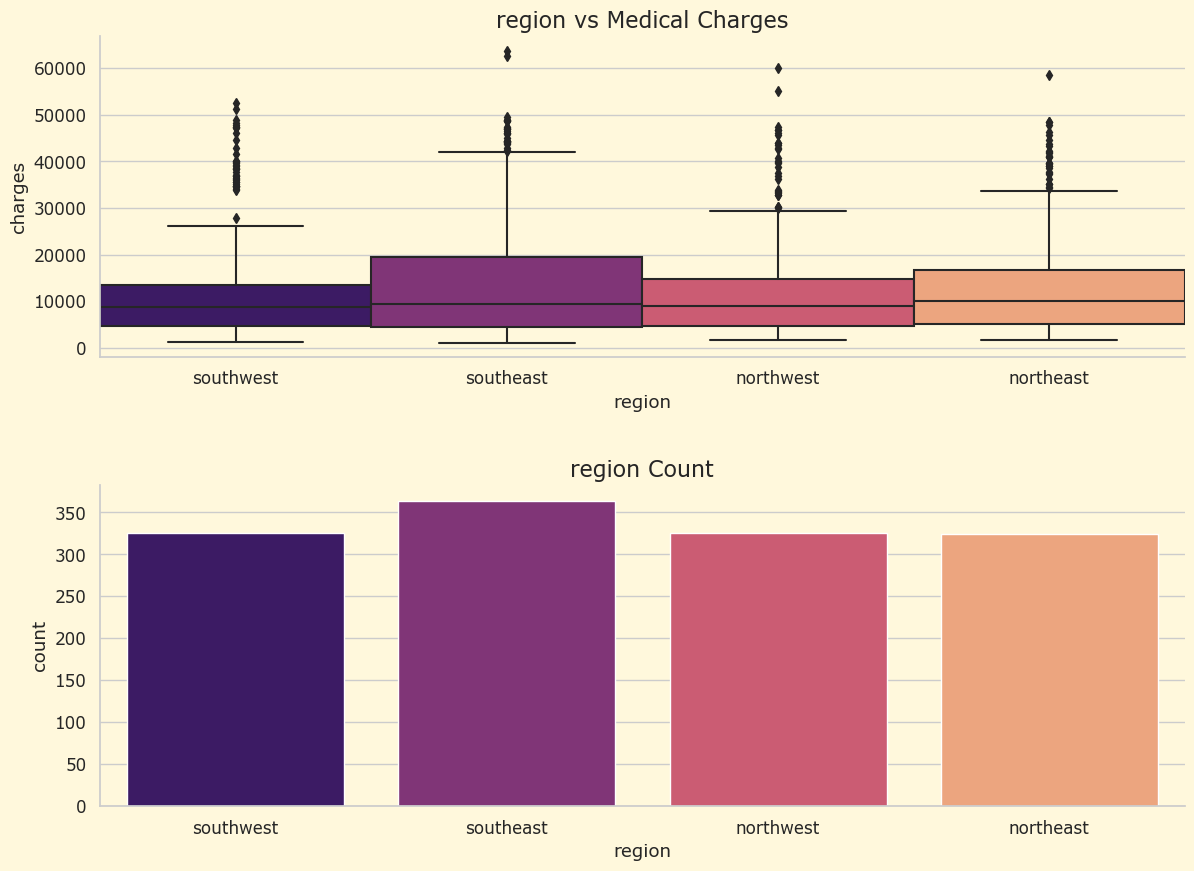

In [8]:
boxplot('region')

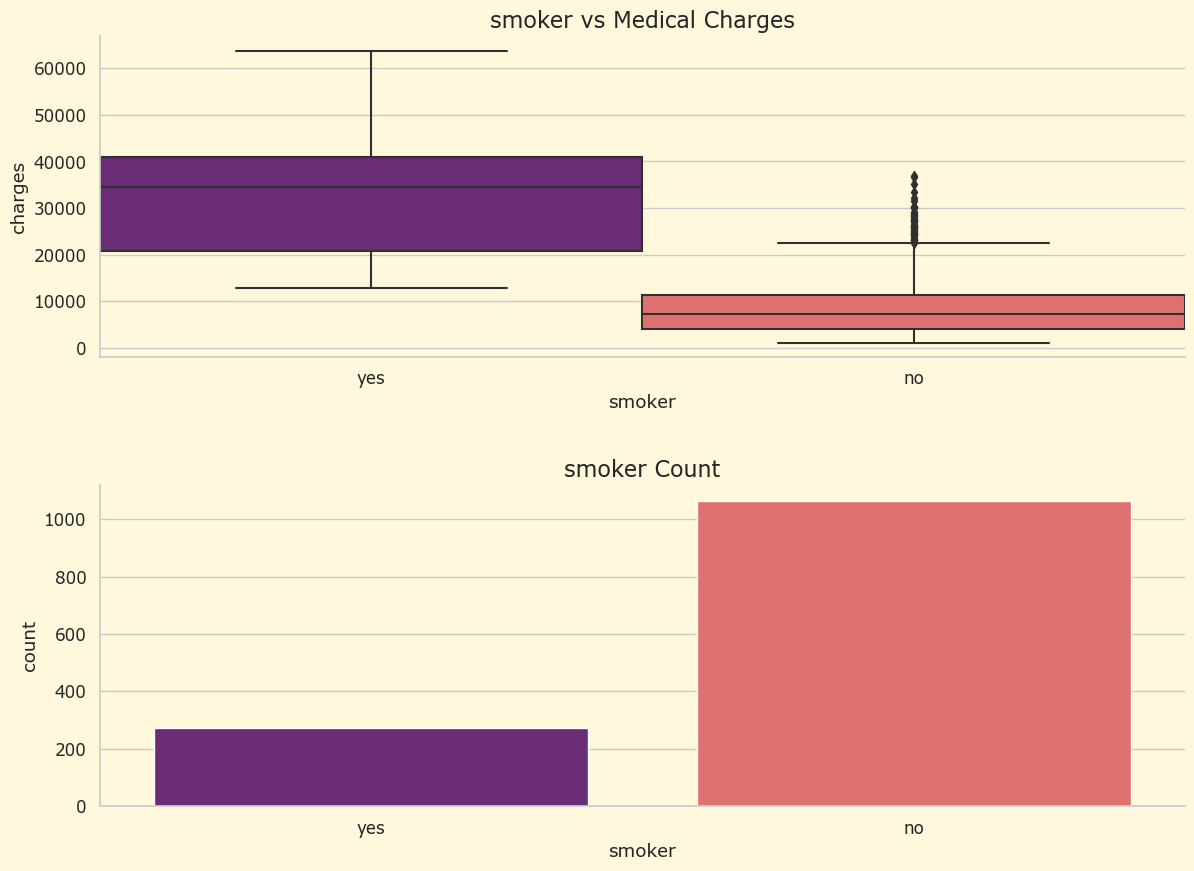

In [9]:
boxplot('smoker')

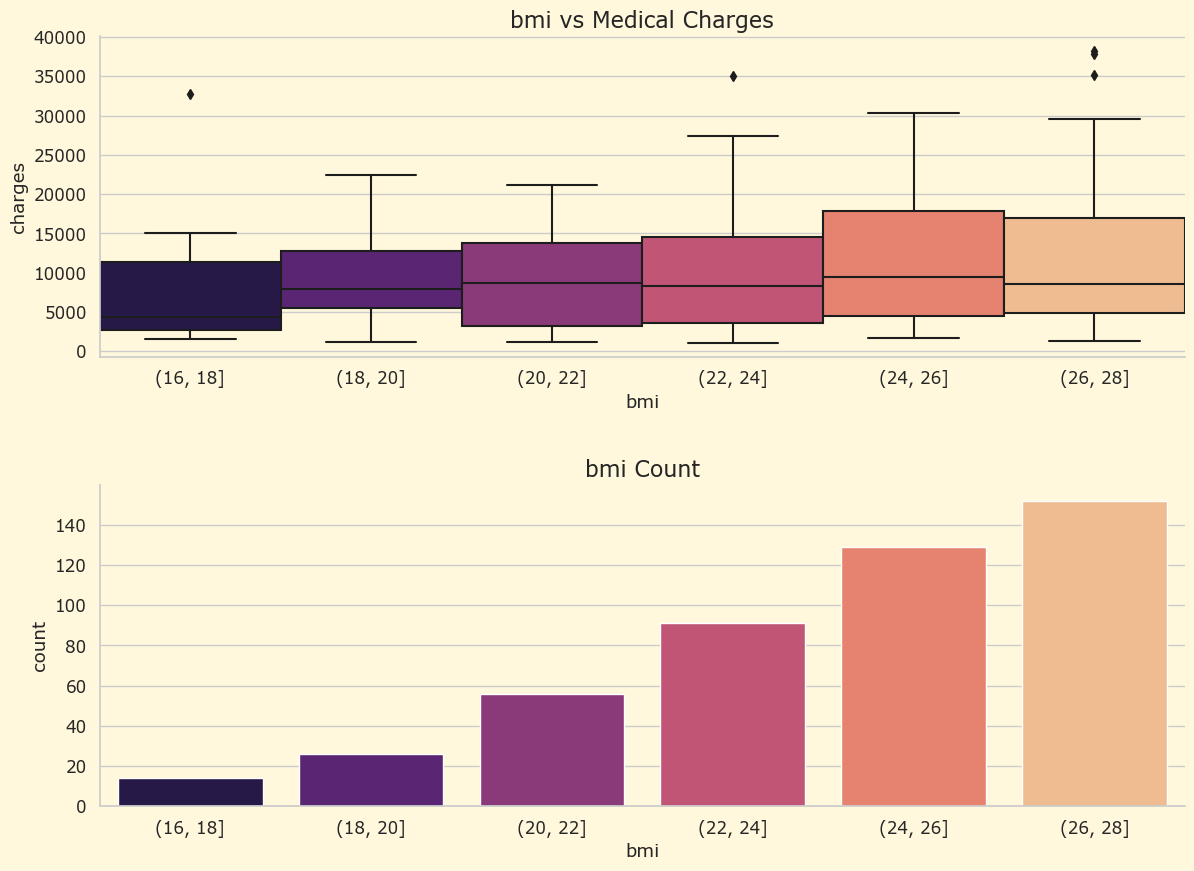

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (14, 10))
sns.boxplot(ax = axes[0], x = pd.cut(data['bmi'], [16,18,20,22,24,26,28]) , y = 'charges', data = data, 
            width = 1, palette = 'magma')
axes[0].ticklabel_format(style = 'plain', axis = 'y')
axes[0].set_title('bmi vs Medical Charges', fontsize = 16)

sns.countplot(ax = axes[1], x = pd.cut(data['bmi'], [16,18,20,22,24,26,28]) , 
              data = data, palette = 'magma')
axes[1].set_title(('bmi Count'), fontsize = 16)
plt.subplots_adjust(hspace = 0.4)

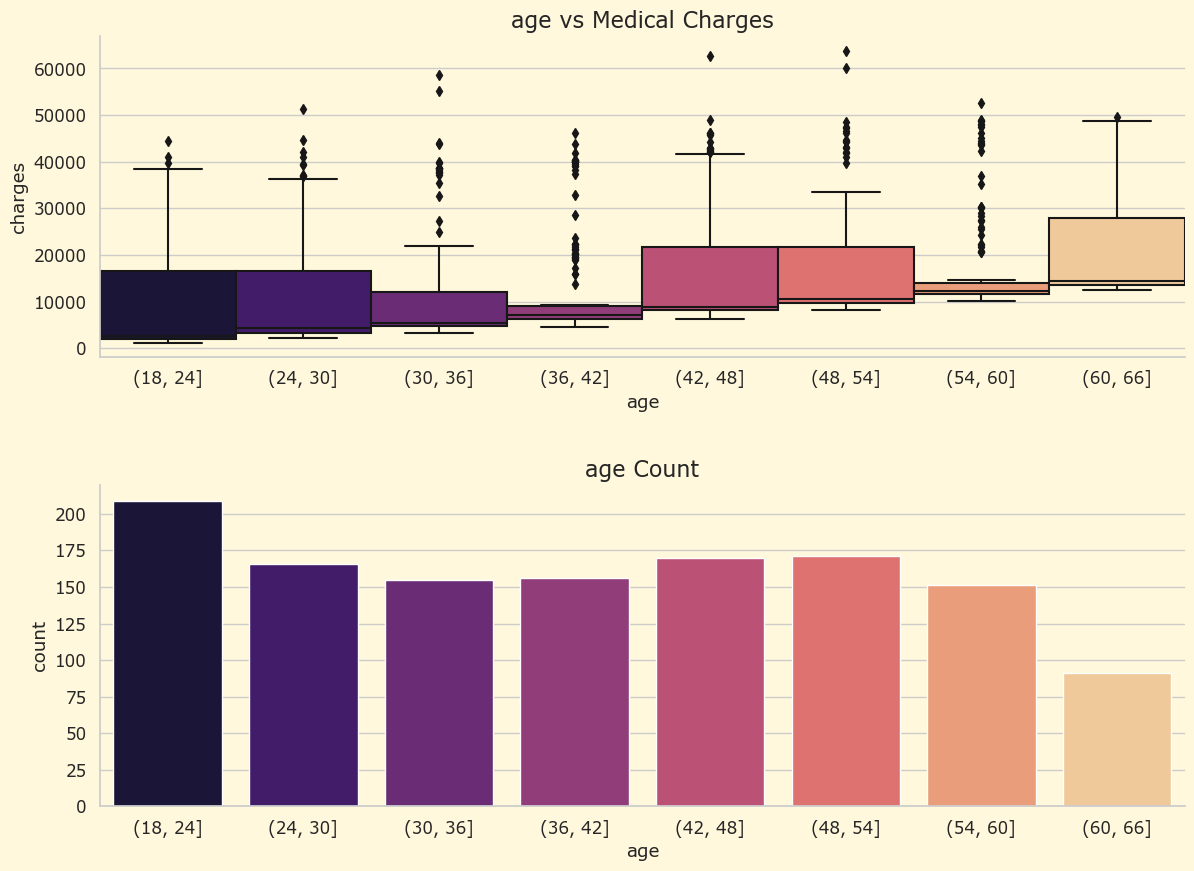

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (14, 10))
sns.boxplot(ax = axes[0], x = pd.cut(data['age'], [18, 24, 30, 36, 42, 48, 54, 60, 66]) , 
            y = 'charges', data = data, 
            width = 1, palette = 'magma')
axes[0].ticklabel_format(style = 'plain', axis = 'y')
axes[0].set_title('age vs Medical Charges', fontsize = 16)

sns.countplot(ax = axes[1], x = pd.cut(data['age'], [18, 24, 30, 36, 42, 48, 54, 60, 66]) , 
              data = data, palette = 'magma')
axes[1].set_title(('age Count'), fontsize = 16)
plt.subplots_adjust(hspace = 0.4)

In [12]:
data.sex = data.sex.astype('category').cat.codes
data.smoker = data.smoker.astype('category').cat.codes
data.region = data.region.astype('category').cat.codes

In [13]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, )

In [15]:
def accuracy_score(model):
    y_pred = model.predict(X_test)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    mse = (mean_squared_error(y_test, y_pred))
    rmse = np.sqrt(mse)
    print('Training accuracy is ', train_acc)
    print('Testing accuracy is ', test_acc)
    print('Root Mean Square Error is ', rmse)
    return [(train_acc * 100), (test_acc * 100) , rmse]

### Linear Regression

In [16]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [17]:
accuracy_score(model1)

Training accuracy is  0.7590734453942714
Testing accuracy is  0.7255040260214192
Root Mean Square Error is  6470.414255177965


[75.90734453942713, 72.55040260214192, 6470.414255177965]

### Lasso Regression

In [18]:
model2 = Lasso(10)
model2.fit(X_train, y_train)

Lasso(alpha=10)

In [19]:
accuracy_score(model1)

Training accuracy is  0.7590734453942714
Testing accuracy is  0.7255040260214192
Root Mean Square Error is  6470.414255177965


[75.90734453942713, 72.55040260214192, 6470.414255177965]

### Ridge Regression

In [20]:
model3 = Ridge(0.1)
model3.fit(X_train, y_train)

Ridge(alpha=0.1)

In [21]:
accuracy_score(model3)

Training accuracy is  0.7590732127795182
Testing accuracy is  0.725489969779048
Root Mean Square Error is  6470.579919805753


[75.90732127795182, 72.5489969779048, 6470.579919805753]

### Decision Tree Regressor

In [22]:
model4 = DecisionTreeRegressor(max_depth = 3)
model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [23]:
accuracy_score(model4)

Training accuracy is  0.8667742028904671
Testing accuracy is  0.8118720681354985
Root Mean Square Error is  5356.6187538028935


[86.67742028904671, 81.18720681354985, 5356.6187538028935]

### Random Forest Regressor

In [24]:
model5 = RandomForestRegressor(max_depth = 4)
model5.fit(X_train, y_train)

RandomForestRegressor(max_depth=4)

In [25]:
accuracy_score(model5)

Training accuracy is  0.8857601088462146
Testing accuracy is  0.8325407957701195
Root Mean Square Error is  5053.806485568865


[88.57601088462145, 83.25407957701195, 5053.806485568865]

In [26]:
results = pd.DataFrame(columns = ['Training Accuracy', 'Testing Accuracy', 'Root Mean Squared Error'],
                      index = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
                               'Decision Tree Regression', 'Random Forest Regression'])

In [27]:
results.loc['Linear Regression'] = accuracy_score(model1)
results.loc['Lasso Regression'] = accuracy_score(model2)
results.loc['Ridge Regression'] = accuracy_score(model3)
results.loc['Decision Tree Regression'] = accuracy_score(model4)
results.loc['Random Forest Regression'] = accuracy_score(model5)

Training accuracy is  0.7590734453942714
Testing accuracy is  0.7255040260214192
Root Mean Square Error is  6470.414255177965
Training accuracy is  0.7590650239422426
Testing accuracy is  0.7253835511220168
Root Mean Square Error is  6471.834015515115
Training accuracy is  0.7590732127795182
Testing accuracy is  0.725489969779048
Root Mean Square Error is  6470.579919805753
Training accuracy is  0.8667742028904671
Testing accuracy is  0.8118720681354985
Root Mean Square Error is  5356.6187538028935
Training accuracy is  0.8857601088462146
Testing accuracy is  0.8325407957701195
Root Mean Square Error is  5053.806485568865


In [28]:
results

Training Accuracy Testing Accuracy  \
Linear Regression                75.907345        72.550403   
Lasso Regression                 75.906502        72.538355   
Ridge Regression                 75.907321        72.548997   
Decision Tree Regression          86.67742        81.187207   
Random Forest Regression         88.576011         83.25408   

                         Root Mean Squared Error  
Linear Regression                    6470.414255  
Lasso Regression                     6471.834016  
Ridge Regression                      6470.57992  
Decision Tree Regression             5356.618754  
Random Forest Regression             5053.806486